In [4]:
# please make sure your drive_path is set, so that the notebook can find the data files on the hard drive

# OS X
drive_path = '/Volumes/Brain2016'

# Windows (a good guess)
# drive_path = 'e:/'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2016/'

In [5]:
# imports go here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import tensorflow.contrib.learn.python.learn as learn

In [6]:
# prepare cache for Brain Observatory Data (from hard drive)
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [7]:
# choose a session (here I've chosen a session with the "Session A" stimulus, for drifting gratings)
session_id = 501132496

data_set = boc.get_ophys_experiment_data(ophys_experiment_id = session_id)

In [8]:
# get the stimulus response info for drifting gratings
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

dg = DriftingGratings(data_set)

/Users/bilalbari/anaconda/lib/python2.7/site-packages/allensdk/brain_observatory/stimulus_analysis.py:327: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temp = self.celltraces[nc, start:end]
/Users/bilalbari/anaconda/lib/python2.7/site-packages/allensdk/brain_observatory/stimulus_analysis.py:330: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sweep_response['dx'][index] = self.dxcm[start:end]


In [10]:
# take a look at the table for mean response by trial

num_trials,num_traces = dg.mean_sweep_response.shape
num_cells = num_traces - 1  # because one trace is the running speed ('dx')


dg.mean_sweep_response

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,dx
0,3.924288,139.039246,3.320146,4.998099,1.681830,5.663136,2.919455,0.918880,-3.759009,3.555691,...,0.645828,-0.875782,-3.214458,0.474641,-2.173970,1.003021,0.414215,1.177390,-1.611366,-0.066844
1,11.187183,-24.438265,2.673344,-0.293247,3.444310,1.934456,0.668622,6.963308,-3.042664,5.318217,...,2.709987,55.290691,9.364721,1.938032,0.385931,2.058041,1.408415,-0.849697,8.414009,-0.003886
2,-0.389491,-3.373666,-1.105948,-3.351060,-6.802246,-8.136486,-2.200871,-4.114766,1.099198,0.643019,...,-0.382965,-23.700367,2.227257,-2.507078,6.320639,0.508618,-0.111236,3.562952,-7.060203,-0.017735
3,-3.648354,-0.201499,-1.394195,2.023925,0.865427,-1.500949,-0.049483,-0.148969,2.382510,-0.147107,...,-1.366849,67.413918,-0.671766,-0.474635,0.823868,0.926811,-1.400171,-1.315529,0.547427,0.044397
4,-5.695783,-6.672735,1.123534,-4.644054,1.922332,0.822137,2.217314,-1.290334,-3.215374,-6.528415,...,-0.808711,-17.756134,-3.919241,0.325657,-2.346906,-0.070429,0.938984,-2.778193,-4.067456,0.796255
5,3.105288,0.270228,-1.131875,-3.345745,-2.742775,-2.914334,-2.938337,-1.104345,-2.640578,-0.969058,...,0.045305,40.664608,1.221713,-2.125975,-44.827511,-1.314613,-4.855375,-7.632878,-5.547353,14.656958
6,1.913040,-5.720100,-2.191884,-2.941567,5.448968,-0.039351,-1.169098,0.411887,-3.637960,0.140610,...,0.147944,-24.849033,-0.323507,-0.082678,-5.189839,-3.281437,-1.677512,-1.574794,0.294556,5.851471
7,-3.638568,-5.278098,-3.767323,-3.667766,-3.329220,-4.234958,-3.651684,-6.762294,6.556122,-1.140049,...,2.653934,4.629211,7.787938,-3.595284,3.150859,6.502433,3.341332,2.514690,-6.887974,-0.112774
8,1.965379,-1.220630,-2.411900,-0.384438,1.123843,1.443959,-2.941186,0.521265,2.170068,-0.329759,...,-0.178237,-0.663309,0.334645,-1.287442,0.334880,1.449013,0.798468,-0.794909,-3.788896,-0.016343
9,-0.523103,-1.307847,-3.954524,-1.976030,-1.326262,1.303590,-1.997757,0.526156,-0.404156,-0.034587,...,-0.469388,0.630100,0.566566,-0.006475,-0.055857,-1.762099,-1.806312,0.888357,-1.280843,-0.022777


In [11]:
# take a look at the table for stimulus conditions
dg.stim_table

,temporal_frequency,orientation,blank_sweep,start,end
0,1.0,180.0,0.0,746,806
1,4.0,0.0,0.0,836,896
2,8.0,135.0,0.0,927,986
3,4.0,0.0,0.0,1017,1077
4,4.0,135.0,0.0,1107,1167
5,15.0,180.0,0.0,1198,1257
6,4.0,90.0,0.0,1288,1348
7,8.0,90.0,0.0,1378,1438
8,8.0,270.0,0.0,1468,1528
9,15.0,45.0,0.0,1559,1618


TensorFlow has a simple interface that mimics the SciKit Learn interface.

We'll kill two birds with one stone and describe that here.

In [12]:
# For the purposes of this demo, we'll create a "train-test" split with "leave-one-out".  
# Let's write a function to use the ith trial as the "test" set and the remainder as the "train" set.
# We'll use 'orientation' as the variable to decode and the vector of population activity as the input.

def leave_one_out(i,stim,response,to_decode='orientation'):
    
    output = stim[to_decode]
    
    num_samples = len(output)
    #print num_samples
    output_test = np.array([output[i]]).reshape((1,-1))
    output_train = np.array(output.drop(i)) #.reshape((num_samples-1,-1))
    
    resp = response.drop('dx',axis=1)
    
    response_test = np.array(resp.loc[i]).reshape((1,-1))
    response_train = np.array(resp.drop(i)) #.reshape((num_samples-1,-1))
    
    return output_test.astype(np.float32),output_train.astype(np.float32),\
            response_test.astype(np.float32), response_train.astype(np.float32)

In [13]:
# grab the first trial for the test set

output_test, output_train, response_test, response_train = leave_one_out(0,dg.stim_table,dg.mean_sweep_response)

In [14]:
print output_test.shape
print output_train.shape
print response_test.shape
print response_train.shape

classes = np.unique(output_train)
print classes

num_classes = len(classes)

(1, 1)
(627,)
(1, 117)
(627, 117)
[   0.   45.   90.  135.  180.  225.  270.  315.]


In [15]:
# This is supposed to be the sklearn style interface for TensorFlow
# This doesn't actually seem to be ready yet.  This ran for several hours before I just cancelled it last night.

ot = output_train/45
ot = ot.astype('int32')

classifier = learn.LinearClassifier(n_classes=num_classes)  # I'm guessing this is Logistic Regression
classifier.fit(response_train,ot,batch_size=10)

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.


KeyboardInterrupt: 

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
classifier = LDA()  
classifier.fit(response_train,output_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
print np.mean(classifier.predict(response_train)==output_train)
print classifier.predict(response_test), output_test

0.893141945774
[ 180.] [[ 180.]]


In [19]:
train_errors = []
test_errors = []
for n in range(num_trials):
    output_test, output_train, response_test, response_train = leave_one_out(n,dg.stim_table,dg.mean_sweep_response)
    classifier = LDA()  
    classifier.fit(response_train,output_train)
    
    train_errors.append(np.mean(classifier.predict(response_train)!=output_train))
    test_errors.append((classifier.predict(response_test)!=output_test)[0][0])
    #print classifier.predict(response_test), output_test
    
print "Mean train error = ", np.mean(train_errors)
print "Mean test error = ", np.mean(test_errors)

Mean train error =  0.106070764636
Mean test error =  0.277070063694


In [20]:
# let's put that code in a function so that we can use it with multiple classifiers

def Decode(stim,response,decoder=LDA):
    train_errors = []
    test_errors = []
    for n in range(num_trials):
        output_test, output_train, response_test, response_train = leave_one_out(n,stim,response)
        classifier = decoder()
        classifier.fit(response_train,output_train)

        train_errors.append(np.mean(classifier.predict(response_train)!=output_train))
        test_errors.append((classifier.predict(response_test)!=output_test)[0][0])
        #print classifier.predict(response_test), output_test

    print "Decoder = ", decoder
    print "Mean train error = ", np.mean(train_errors)
    print "Mean test error = ", np.mean(test_errors)
    
    return np.mean(train_errors), np.mean(test_errors)

In [21]:
Decode(dg.stim_table,dg.mean_sweep_response)

Decoder =  <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Mean train error =  0.106070764636
Mean test error =  0.277070063694


(0.10607076463596746, 0.27707006369426751)

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [23]:
Decode(dg.stim_table,dg.mean_sweep_response,decoder=QDA)

/Users/bilalbari/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Decoder =  <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Mean train error =  0.0
Mean test error =  0.826433121019


(0.0, 0.82643312101910826)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# This will take awhile

Decode(dg.stim_table,dg.mean_sweep_response,decoder=LogisticRegression)

Decoder =  <class 'sklearn.linear_model.logistic.LogisticRegression'>
Mean train error =  0.0015923566879
Mean test error =  0.25


(0.0015923566878980893, 0.25)

In [27]:
from sklearn.svm import SVC

In [28]:
# This will also take awhile

Decode(dg.stim_table,dg.mean_sweep_response,decoder=SVC)

Decoder =  <class 'sklearn.svm.classes.SVC'>
Mean train error =  0.0
Mean test error =  0.834394904459


(0.0, 0.83439490445859876)

Note above that I'm not using any arguments to the classifier definitions.  For example, we could improve the SVM performance by adjusting regularization or choosing between linear or radial basis functions for the kernel definition.  You'd need to adjust the function definition above to pass those arguments as well.


Now let's try building a classifier with TensorFlow.

We'll build a simple LogisticRegression classifier.  After that, we'll try adding layers and see what happens.

The first thing we need to do is define the Variables we'll use in our computation graph.

In [26]:
# create the variables with randomize initial values

W = tf.Variable(0.01*np.random.normal(size=[num_cells,num_classes]),dtype=tf.float32)
b = tf.Variable(0.01*np.random.normal(num_classes),dtype=tf.float32)

# The "responses" from which we'll decode will be "placeholders"

R = tf.placeholder(tf.float32,shape=(None,num_cells))  # None means that this dimension can have an arbitrary length
Y = tf.placeholder(tf.float32,shape=(None,num_classes)) # "one-hot" encoding of stimulus condition

In [95]:
# Since we're going to use "one-hot" encoding, we better have a function that will convert our "output" variable above 
# to "one-hot".

def one_hot(output,classes):
    #classes = np.unique(output)
    
    output_one_hot = np.zeros([output.shape[0],len(classes)],dtype=np.float32)
    #print output_one_hot.shape
    for i,stim in enumerate(classes):
        output_one_hot.T[i][np.where(output==stim)[0]] = 1
        
    return output_one_hot

In [96]:
output_train_onehot = one_hot(output_train,np.unique(output_train))
output_test_onehot = one_hot(output_test,np.unique(output_train))

In [97]:
linear_input = tf.matmul(R,W)+b  # should have shape (None,num_classes)

In [98]:
Y_prob = tf.nn.softmax(linear_input)     # should still have shape (None,num_classes)

In [99]:
cross_entropy_loss = -tf.reduce_mean(Y*tf.log(Y_prob))

In [100]:
learning_rate = 0.01

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

In [101]:
init_op = tf.initialize_all_variables()

# or we could do
# init_W = W.initializer
# init_b = b.initializer
# etc.

In [102]:
# We need to define a "Session" that will run our computation graph

sess = tf.Session()

In [103]:
sess.run(init_op)

In [104]:
# iterate learning rule a number of times

num_steps = 1000

train_error = []

for step in range(num_steps):
    sess.run(train_op,feed_dict={Y:output_train_onehot,R:response_train})
    
    print "cross entropy loss, iteration %d: = %f" % (step,sess.run(cross_entropy_loss,feed_dict={Y:output_train_onehot,R:response_train}))
    
    incorrect = tf.not_equal(tf.argmax(Y_prob,1),tf.argmax(Y,1))
    percent_incorrect = tf.reduce_mean(tf.cast(incorrect,tf.float32))
    train_error.append(sess.run(percent_incorrect,feed_dict={Y:output_train_onehot,R:response_train}))

cross entropy loss, iteration 0: = 0.301774
cross entropy loss, iteration 1: = 0.265089
cross entropy loss, iteration 2: = 0.238614
cross entropy loss, iteration 3: = 0.218761
cross entropy loss, iteration 4: = 0.204752
cross entropy loss, iteration 5: = 0.194821
cross entropy loss, iteration 6: = 0.187241
cross entropy loss, iteration 7: = 0.181061
cross entropy loss, iteration 8: = 0.175816
cross entropy loss, iteration 9: = 0.171252
cross entropy loss, iteration 10: = 0.167212
cross entropy loss, iteration 11: = 0.163588
cross entropy loss, iteration 12: = 0.160305
cross entropy loss, iteration 13: = 0.157306
cross entropy loss, iteration 14: = 0.154548
cross entropy loss, iteration 15: = 0.151996
cross entropy loss, iteration 16: = 0.149623
cross entropy loss, iteration 17: = 0.147407
cross entropy loss, iteration 18: = 0.145330
cross entropy loss, iteration 19: = 0.143375
cross entropy loss, iteration 20: = 0.141530
cross entropy loss, iteration 21: = 0.139783
cross entropy loss, 

Final train error = 5.90%


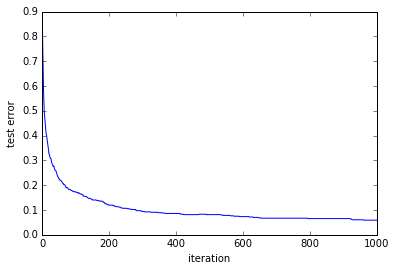

In [105]:
fig,ax = plt.subplots()

ax.plot(train_error)
ax.set_xlabel("iteration")
ax.set_ylabel("test error")

print "Final train error = {0:0.2f}%".format(train_error[-1]*100)

In [82]:
correct = tf.equal(tf.argmax(Y_prob,1),tf.argmax(Y,1))

probs =  sess.run(Y_prob,feed_dict={Y:output_test_onehot,R:response_test})

#print probs
print "stim:  probability"
for i,stim in enumerate(np.unique(output_train)):
    print "%d:  %f" % (stim,probs[0][i])
    
print sess.run(correct,feed_dict={Y:output_test_onehot,R:response_test})

stim:  probability
0:  0.000000
45:  0.000000
90:  0.000000
135:  0.000000
180:  1.000000
225:  0.000000
270:  0.000000
315:  0.000000
[ True]


That was a network with no "hidden" units.  Let's try a network with one hidden layer and see what happens.  I'm using new variable names for similar objects to avoid name collision in the same notebook.

In [368]:
# create the variables with randomize initial values

num_hidden = 30

W_input = tf.Variable(0.01*np.random.normal(size=[num_cells,num_hidden]),dtype=tf.float32)
b_input = tf.Variable(0.01*np.random.normal(num_hidden),dtype=tf.float32)

W_hidden = tf.Variable(0.01*np.random.normal(size=[num_hidden,num_classes]),dtype=tf.float32)
b_hidden = tf.Variable(0.01*np.random.normal(num_classes),dtype=tf.float32)

# The "responses" from which we'll decode will be "placeholders"
R_hidden = tf.placeholder(tf.float32,shape=(None,num_cells))  # None means that this dimension can have an arbitrary length
Y_hidden = tf.placeholder(tf.float32,shape=(None,num_classes)) # "one-hot" encoding of stimulus condition

# define the ops for the outputs

# we'll use a relu for the output of the hidden layer
hidden_layer_output = tf.nn.relu(tf.matmul(R_hidden,W_input) + b_input)

# and softmax for the estimate of the probabilities
Y_prob_hidden = tf.nn.softmax(tf.matmul(hidden_layer_output,W_hidden) + b_hidden)

In [369]:
beta = 0.05

# adding L2 normalization to the weights for this model
cross_entropy_loss_hidden = -tf.reduce_mean(Y_hidden*tf.log(Y_prob_hidden) 
                                            + beta*tf.nn.l2_loss(W_input) 
                                            + beta*tf.nn.l2_loss(W_hidden) 
                                            + beta*tf.nn.l2_loss(b_input) 
                                            + beta*tf.nn.l2_loss(b_hidden))

learning_rate = 0.01

train_op_hidden = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss_hidden)

init_op_hidden = tf.initialize_all_variables()

sess_hidden = tf.Session()

sess_hidden.run(init_op_hidden)

In [370]:
# iterate learning rule a number of times

num_steps = 1000

train_error_hidden = []

for step in range(num_steps):
    sess_hidden.run(train_op_hidden,feed_dict={Y_hidden:output_train_onehot,R_hidden:response_train})
    
    print "cross entropy loss, iteration %d: = %f" % (step,sess_hidden.run(cross_entropy_loss_hidden,feed_dict={Y_hidden:output_train_onehot,R_hidden:response_train}))
    
    incorrect = tf.not_equal(tf.argmax(Y_prob_hidden,1),tf.argmax(Y_hidden,1))
    percent_incorrect = tf.reduce_mean(tf.cast(incorrect,tf.float32))
    train_error_hidden.append(sess_hidden.run(percent_incorrect,feed_dict={Y_hidden:output_train_onehot,R_hidden:response_train}))

cross entropy loss, iteration 0: = 0.248864
cross entropy loss, iteration 1: = 0.248749
cross entropy loss, iteration 2: = 0.248637
cross entropy loss, iteration 3: = 0.248525
cross entropy loss, iteration 4: = 0.248413
cross entropy loss, iteration 5: = 0.248301
cross entropy loss, iteration 6: = 0.248186
cross entropy loss, iteration 7: = 0.248080
cross entropy loss, iteration 8: = 0.247964
cross entropy loss, iteration 9: = 0.247852
cross entropy loss, iteration 10: = 0.247742
cross entropy loss, iteration 11: = 0.247626
cross entropy loss, iteration 12: = 0.247520
cross entropy loss, iteration 13: = 0.247405
cross entropy loss, iteration 14: = 0.247294
cross entropy loss, iteration 15: = 0.247182
cross entropy loss, iteration 16: = 0.247068
cross entropy loss, iteration 17: = 0.246962
cross entropy loss, iteration 18: = 0.246846
cross entropy loss, iteration 19: = 0.246735
cross entropy loss, iteration 20: = 0.246623
cross entropy loss, iteration 21: = 0.246506
cross entropy loss, 

Final train error = 19.62%


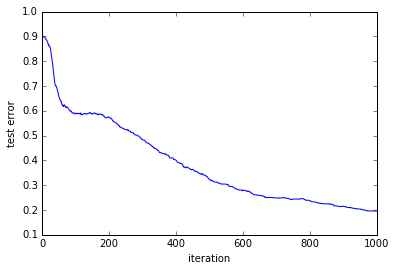

In [371]:
fig,ax = plt.subplots()

ax.plot(train_error_hidden)
ax.set_xlabel("iteration")
ax.set_ylabel("test error")

print "Final train error = {0:0.2f}%".format(train_error_hidden[-1]*100)